# Fibonacci Retracement Stock Trading Strategy

Based on [Fibonacci Retracement Stock Trading Strategy](https://www.youtube.com/watch?v=HM5j52Q4es4) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

This program uses Fibonacci Retracement Levels and MACD to indicate when to buy and sell stock.

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

Load the data

In [3]:
df = pd.read_csv('AAPL_Data.csv')

Show the data

In [4]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-04-20,33.474826,33.877794,33.460604,33.764015,93278400,0.0,0
1,2017-04-21,33.764013,33.820900,33.624160,33.723717,69283600,0.0,0
2,2017-04-24,34.015276,34.121944,33.939422,34.048462,68537200,0.0,0
3,2017-04-25,34.112466,34.347134,34.102982,34.259430,75486000,0.0,0
4,2017-04-26,34.245201,34.276018,33.986828,34.057938,80164800,0.0,0
...,...,...,...,...,...,...,...,...
84,2017-08-18,37.721174,38.113058,37.448768,37.635151,109712400,0.0,0
85,2017-08-21,37.635159,37.728351,37.064061,37.565865,105474000,0.0,0
86,2017-08-22,37.809591,38.232540,37.759413,38.179970,86418400,0.0,0
87,2017-08-23,38.010308,38.344841,37.964906,38.227753,77596400,0.0,0


Set the date as index

In [5]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [6]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2017-04-20,2017-04-20,33.474826,33.877794,33.460604,33.764015,93278400,0.0,0
2017-04-21,2017-04-21,33.764013,33.820900,33.624160,33.723717,69283600,0.0,0
2017-04-24,2017-04-24,34.015276,34.121944,33.939422,34.048462,68537200,0.0,0
2017-04-25,2017-04-25,34.112466,34.347134,34.102982,34.259430,75486000,0.0,0
2017-04-26,2017-04-26,34.245201,34.276018,33.986828,34.057938,80164800,0.0,0
...,...,...,...,...,...,...,...,...
2017-08-18,2017-08-18,37.721174,38.113058,37.448768,37.635151,109712400,0.0,0
2017-08-21,2017-08-21,37.635159,37.728351,37.064061,37.565865,105474000,0.0,0
2017-08-22,2017-08-22,37.809591,38.232540,37.759413,38.179970,86418400,0.0,0
2017-08-23,2017-08-23,38.010308,38.344841,37.964906,38.227753,77596400,0.0,0


Plot the data

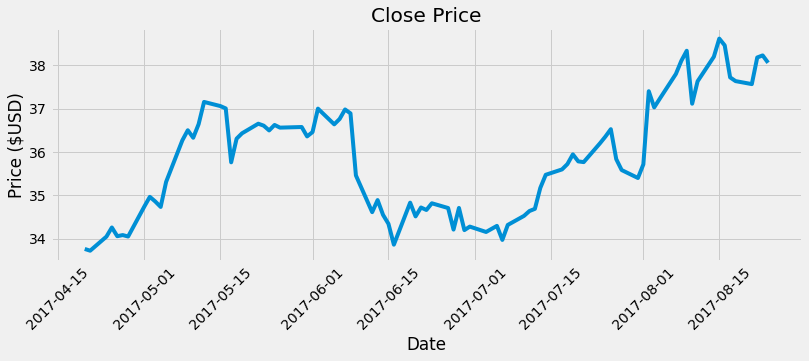

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df.Close)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.xticks(rotation=45)
plt.show()

Caclualte the Fibonacci Retracement Levels

In [8]:
maximum_price = df['Close'].max()
minimum_price = df['Close'].min()
difference = maximum_price - minimum_price
first_level = maximum_price - difference * 0.236
second_level = maximum_price - difference * 0.382
third_level = maximum_price - difference * 0.5
fourth_level = maximum_price - difference * 0.618

## Calculate the MACD Line and the Signal Line indicators

Calculate the Short Term Exponential Moving Average

In [9]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()

Calculate the Long Term Exponential Moving Average

In [10]:
LongEMA = df.Close.ewm(span=26, adjust=False).mean()

Calculate the Moving Average Convergence/Divergence (MACD)

In [11]:
MACD = ShortEMA - LongEMA

Calculate the Signal Line

In [12]:
signal = MACD.ewm(span=9, adjust=False).mean()

## Plot the Fibonacci Retracement Levels along with the Close price and the MACD and Signal Line

In [13]:
new_df = df

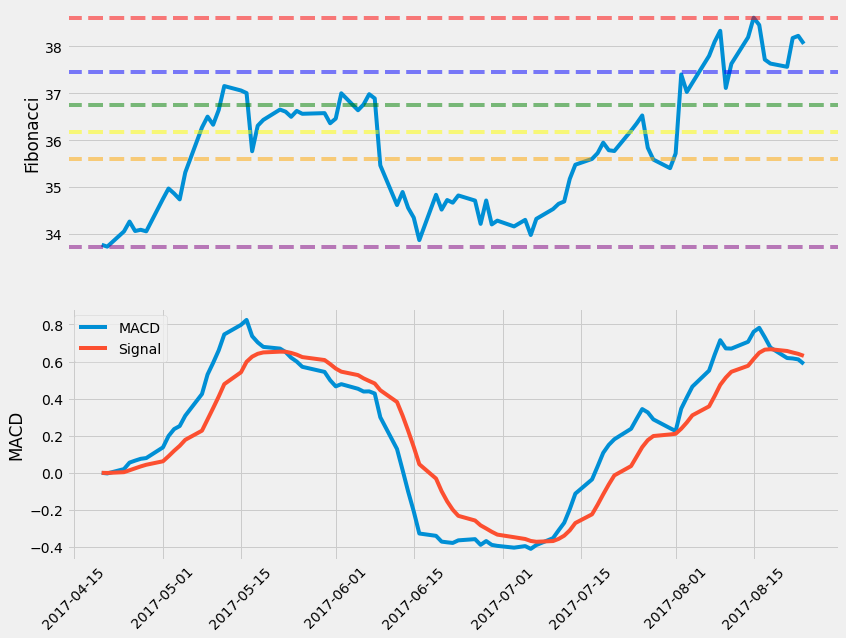

In [14]:
plt.figure(figsize=(12.33,9.5))

# Plot the Fibonacci Levels
plt.subplot(2,1,1)
plt.plot(new_df.index, new_df.Close)
plt.axhline(maximum_price, linestyle='--', alpha=0.5, color='red')
plt.axhline(fourth_level, linestyle='--', alpha=0.5, color='orange')
plt.axhline(third_level, linestyle='--', alpha=0.5, color='yellow')
plt.axhline(second_level, linestyle='--', alpha=0.5, color='green')
plt.axhline(first_level, linestyle='--', alpha=0.5, color='blue')
plt.axhline(minimum_price, linestyle='--', alpha=0.5, color='purple')
plt.ylabel('Fibonacci')
# Remove X ticks
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

# Plot the MACD line and the Signal Line
plt.subplot(2,1,2)
plt.plot(new_df.index, MACD, label='MACD')
plt.plot(new_df.index, signal, label='Signal')
plt.ylabel('MACD')
plt.legend()

plt.xticks(rotation=45)
# plt.show()

plt.savefig('Fig1.png')

Create new columns for the data frame

In [15]:
df['MACD'] = MACD
df['Signal Line'] = signal

Show the new data

In [16]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line
2017-04-20,2017-04-20,33.474826,33.877794,33.460604,33.764015,93278400,0.0,0,0.000000,0.000000
2017-04-21,2017-04-21,33.764013,33.820900,33.624160,33.723717,69283600,0.0,0,-0.003215,-0.000643
2017-04-24,2017-04-24,34.015276,34.121944,33.939422,34.048462,68537200,0.0,0,0.020209,0.003527
2017-04-25,2017-04-25,34.112466,34.347134,34.102982,34.259430,75486000,0.0,0,0.055160,0.013854
2017-04-26,2017-04-26,34.245201,34.276018,33.986828,34.057938,80164800,0.0,0,0.065841,0.024251
...,...,...,...,...,...,...,...,...,...,...
2017-08-18,2017-08-18,37.721174,38.113058,37.448768,37.635151,109712400,0.0,0,0.675561,0.666451
2017-08-21,2017-08-21,37.635159,37.728351,37.064061,37.565865,105474000,0.0,0,0.619048,0.656971
2017-08-22,2017-08-22,37.809591,38.232540,37.759413,38.179970,86418400,0.0,0,0.616705,0.648918
2017-08-23,2017-08-23,38.010308,38.344841,37.964906,38.227753,77596400,0.0,0,0.611654,0.641465


Create a function to be used in our strategy to get the upper Fibonacci Level and the Lower Fibonacci Level of the current price 

In [17]:
def getLevels(price):
    if price >= first_level:
        return (maximum_price, first_level)
    elif price >= second_level:
        return (first_level, second_level)
    elif price >= third_level:
        return (second_level, third_level)
    elif price >= fourth_level:
        return (third_level, fourth_level)
    else:
        return (fourth_level, minimum_price)

Create a function for the trading strategy

In [18]:
# The Strategy
# If the signal line crosses above the MACD Line 
# and the current price crossed above or below the last Fibonacci Level then buy
# If the signal line crosses below the MACD Line
# and the current price crossed above or below the last Fibonacci Level then sell
# Never sell at a price that is lower than I bought

def strategy(df):
    buy_list = []
    sell_list = []
    flag = 0
    last_buy_price = 0
    
    # Loop through the data set
    for i in range(0, df.shape[0]):
        price = df['Close'][i]
        # If this is the first data point within the data set, then get the level above and below it.
        if i==0:
            upper_lvl, lower_lvl = getLevels(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        # Else if the current price is greater than or equal to the upper_lvl, 
        # or less than or equal to the lower_lvl
        # then we know the price has 'hit' or crossed a new Fibonacci Level
        elif price >= upper_lvl or price <= lower_lvl:
            # Check to see if the MACD Line crossed above or below the signal line
            if df['Signal Line'][i] > df['MACD'][i] and flag == 0:
                last_buy_price = price
                buy_list.append(price)
                sell_list.append(np.nan)
                # Set the flag to 1 to signal that the share was bought
                flag = 1
            elif df['Signal Line'][i] < df['MACD'][i] and flag == 1 and price >= last_buy_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                # Set the flag to 0 to signal that the share was sold
                flag = 0
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
        # Update the new levels
        upper_lvl, lower_lvl = getLevels(price)
        
    return buy_list, sell_list


Create buy and sell columns

In [19]:
buy, sell = strategy(df)
df['Buy_Signal_Price'] = buy
df['Sell_Signal_Price'] = sell

Show the data

In [20]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2017-04-20,2017-04-20,33.474826,33.877794,33.460604,33.764015,93278400,0.0,0,0.000000,0.000000,NaN,NaN
2017-04-21,2017-04-21,33.764013,33.820900,33.624160,33.723717,69283600,0.0,0,-0.003215,-0.000643,33.723717,NaN
2017-04-24,2017-04-24,34.015276,34.121944,33.939422,34.048462,68537200,0.0,0,0.020209,0.003527,NaN,NaN
2017-04-25,2017-04-25,34.112466,34.347134,34.102982,34.259430,75486000,0.0,0,0.055160,0.013854,NaN,NaN
2017-04-26,2017-04-26,34.245201,34.276018,33.986828,34.057938,80164800,0.0,0,0.065841,0.024251,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-18,2017-08-18,37.721174,38.113058,37.448768,37.635151,109712400,0.0,0,0.675561,0.666451,NaN,NaN
2017-08-21,2017-08-21,37.635159,37.728351,37.064061,37.565865,105474000,0.0,0,0.619048,0.656971,NaN,NaN
2017-08-22,2017-08-22,37.809591,38.232540,37.759413,38.179970,86418400,0.0,0,0.616705,0.648918,NaN,NaN
2017-08-23,2017-08-23,38.010308,38.344841,37.964906,38.227753,77596400,0.0,0,0.611654,0.641465,NaN,NaN


Plot the Fibonacci Levels along with the close price and with the Buy and Sell signals

In [21]:
new_df = df

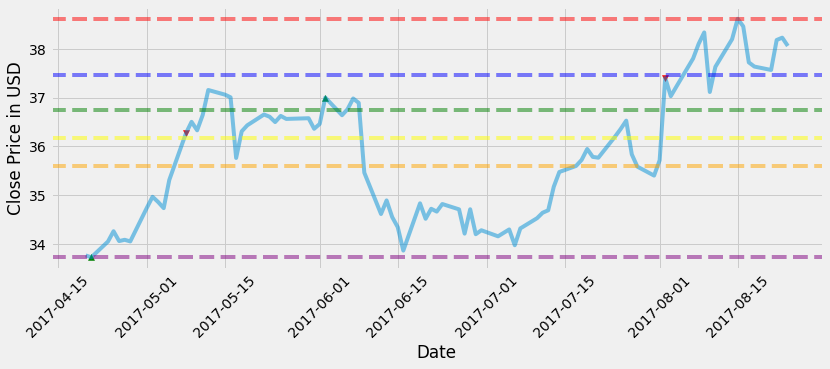

In [22]:
plt.figure(figsize=(12.33,4.5))

# Plot the Fibonacci Levels
plt.plot(new_df.index, new_df.Close, alpha=0.5)
plt.axhline(maximum_price, linestyle='--', alpha=0.5, color='red')
plt.axhline(fourth_level, linestyle='--', alpha=0.5, color='orange')
plt.axhline(third_level, linestyle='--', alpha=0.5, color='yellow')
plt.axhline(second_level, linestyle='--', alpha=0.5, color='green')
plt.axhline(first_level, linestyle='--', alpha=0.5, color='blue')
plt.axhline(minimum_price, linestyle='--', alpha=0.5, color='purple')
plt.scatter(new_df.index, new_df['Buy_Signal_Price'], color='green', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell_Signal_Price'], color='red', marker='v', alpha=1)
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

**THIS IS NOT AN INVESTMENT ADVICE!**